# **Intial Screening through ML**

In [3]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import plotly.figure_factory as ff
import plotly.express as px
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [4]:
dataset = pd.read_csv("/kaggle/input/lung-cancer/survey lung cancer.csv")

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [6]:
dataset.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [7]:
dataset.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [8]:
dataset.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [9]:
dataset.shape

(309, 16)

In [10]:
le = preprocessing.LabelEncoder()
dataset['GENDER'] = le.fit_transform(dataset['GENDER'])
dataset['LUNG_CANCER'] = le.fit_transform(dataset['LUNG_CANCER'])

In [11]:
dataset.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [12]:
dataset.corr()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
GENDER,1.000000,0.021306,0.036277,-0.212959,-0.152127,-0.275564,-0.204606,-0.083560,0.154251,0.141207,0.454268,0.133303,-0.064911,-0.078161,0.362958,0.067254
AGE,0.021306,1.000000,-0.084475,0.005205,0.053170,0.018685,-0.012642,0.012614,0.027990,0.055011,0.058985,0.169950,-0.017513,-0.001270,-0.018104,0.089465
SMOKING,0.036277,-0.084475,1.000000,-0.014585,0.160267,-0.042822,-0.141522,-0.029575,0.001913,-0.129426,-0.050623,-0.129471,0.061264,0.030718,0.120117,0.058179
YELLOW_FINGERS,-0.212959,0.005205,-0.014585,1.000000,0.565829,0.323083,0.041122,-0.118058,-0.144300,-0.078515,-0.289025,-0.012640,-0.105944,0.345904,-0.104829,0.181339
ANXIETY,-0.152127,0.053170,0.160267,0.565829,1.000000,0.216841,-0.009678,-0.188538,-0.165750,-0.191807,-0.165750,-0.225644,-0.144077,0.489403,-0.113634,0.144947
PEER_PRESSURE,-0.275564,0.018685,-0.042822,0.323083,0.216841,1.000000,0.048515,0.078148,-0.081800,-0.068771,-0.159973,-0.089019,-0.220175,0.366590,-0.094828,0.186388
CHRONIC DISEASE,-0.204606,-0.012642,-0.141522,0.041122,-0.009678,0.048515,1.000000,-0.110529,0.106386,-0.049967,0.002150,-0.175287,-0.026459,0.075176,-0.036938,0.110891
FATIGUE,-0.083560,0.012614,-0.029575,-0.118058,-0.188538,0.078148,-0.110529,1.000000,0.003056,0.141937,-0.191377,0.146856,0.441745,-0.132790,-0.010832,0.150673
ALLERGY,0.154251,0.027990,0.001913,-0.144300,-0.165750,-0.081800,0.106386,0.003056,1.000000,0.173867,0.344339,0.189524,-0.030056,-0.061508,0.239433,0.327766
WHEEZING,0.141207,0.055011,-0.129426,-0.078515,-0.191807,-0.068771,-0.049967,0.141937,0.173867,1.000000,0.265659,0.374265,0.037834,0.069027,0.147640,0.249300


In [13]:
hist_data =[dataset["AGE"].values]
group_labels = ['AGE'] 
ax=ff.create_distplot(hist_data, group_labels)

ax.show()

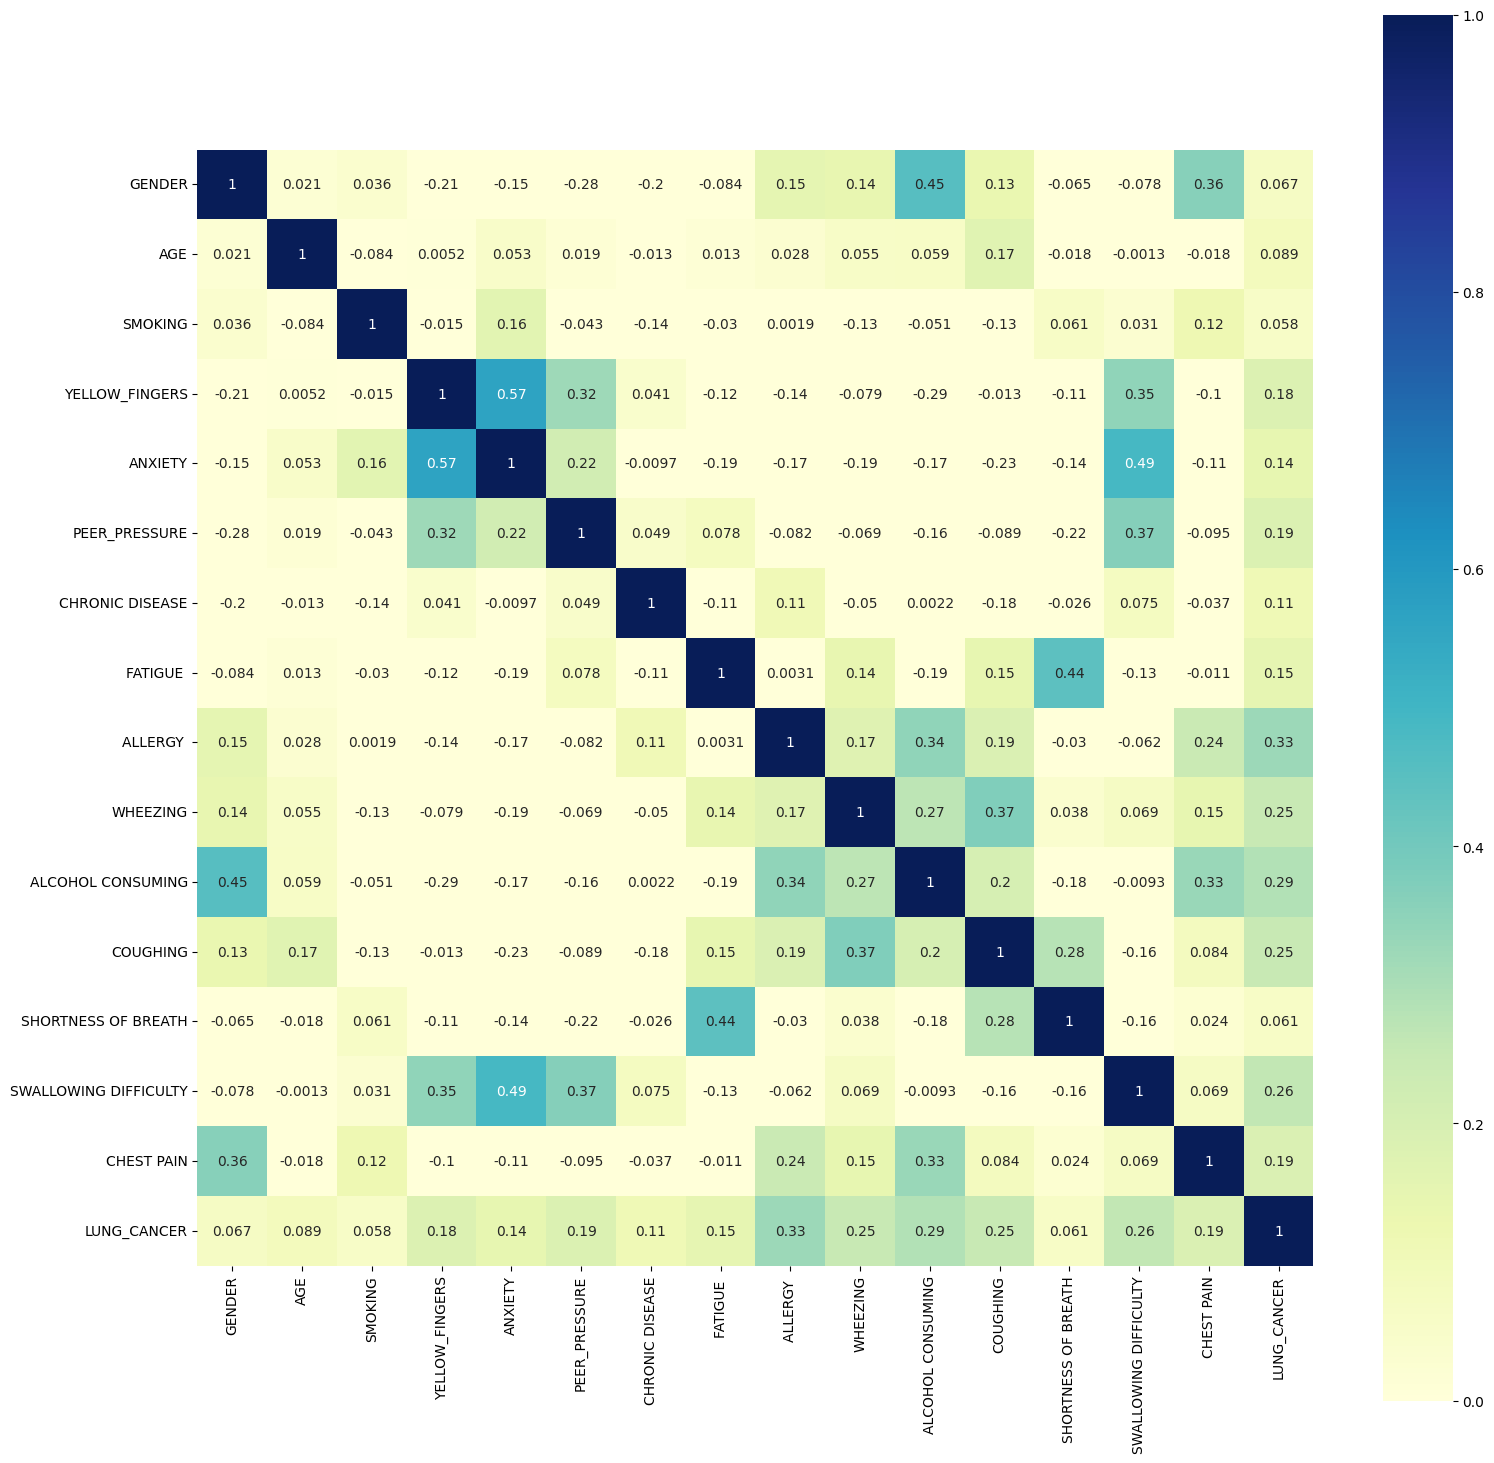

In [14]:
corrmat = dataset.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,annot=True, square=True, vmin=0, vmax=1,cmap="YlGnBu");

<Axes: xlabel='LUNG_CANCER', ylabel='count'>

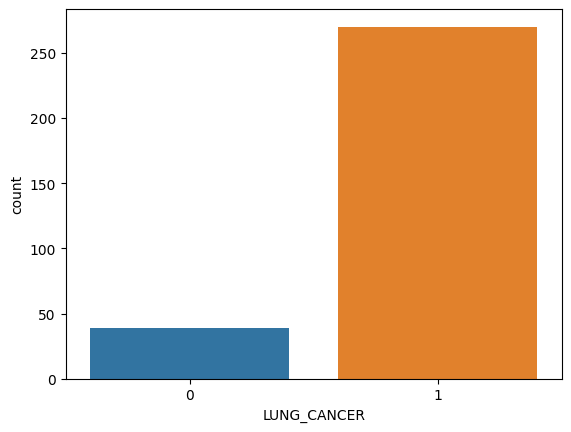

In [15]:
sns.countplot(x = 'LUNG_CANCER',data = dataset)

<Axes: xlabel='YELLOW_FINGERS', ylabel='count'>

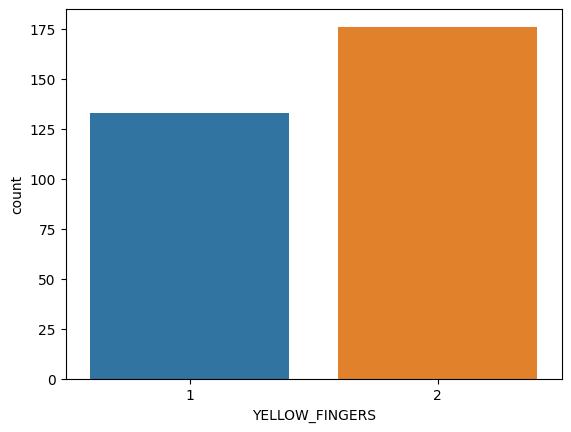

In [16]:
sns.countplot(x = 'YELLOW_FINGERS',data = dataset)

In [17]:
dataset['ANXIETY'].unique()

array([2, 1])

In [18]:
dataset['PEER_PRESSURE'].unique()

array([1, 2])

<Axes: xlabel='CHRONIC DISEASE', ylabel='count'>

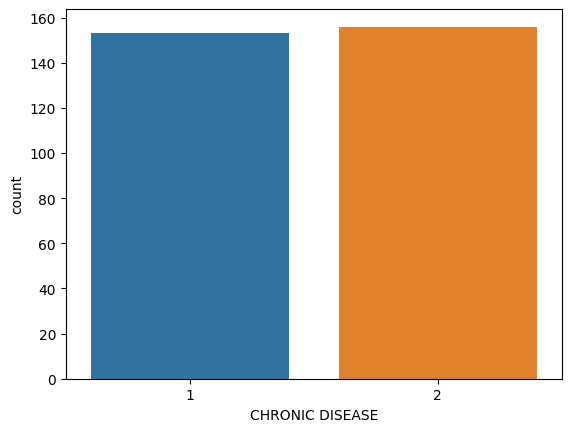

In [19]:
sns.countplot(x = 'CHRONIC DISEASE',data = dataset)

In [20]:
dataset['YELLOW_FINGERS'].unique()

array([2, 1])

In [21]:
values = dataset['LUNG_CANCER'].value_counts().tolist()
names = list(dict(dataset['LUNG_CANCER'].value_counts()).keys())

px.pie(dataset, values=values, names=names, hole = 0.5,
       color_discrete_sequence=["firebrick", "green"])

In [22]:
print(dataset.corr()["LUNG_CANCER"].abs().sort_values(ascending=False))

LUNG_CANCER              1.000000
ALLERGY                  0.327766
ALCOHOL CONSUMING        0.288533
SWALLOWING DIFFICULTY    0.259730
WHEEZING                 0.249300
COUGHING                 0.248570
CHEST PAIN               0.190451
PEER_PRESSURE            0.186388
YELLOW_FINGERS           0.181339
FATIGUE                  0.150673
ANXIETY                  0.144947
CHRONIC DISEASE          0.110891
AGE                      0.089465
GENDER                   0.067254
SHORTNESS OF BREATH      0.060738
SMOKING                  0.058179
Name: LUNG_CANCER, dtype: float64


In [23]:
X = dataset.drop(['AGE','GENDER','LUNG_CANCER'],axis=1)

In [24]:
X

,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,1,2,2,1,1,2,1,2,2,2,2,2,2
1,2,1,1,1,2,2,2,1,1,1,2,2,2
2,1,1,1,2,1,2,1,2,1,2,2,1,2
3,2,2,2,1,1,1,1,1,2,1,1,2,2
4,1,2,1,1,1,1,1,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,1,1,1,2,2,2,1,1,2,2,2,2,1
305,2,1,1,1,1,2,2,2,2,2,2,1,2
306,2,1,1,1,1,1,2,2,2,2,1,1,2
307,2,1,2,1,1,2,2,1,2,2,2,1,2


In [25]:
y = dataset['LUNG_CANCER']

In [26]:
y

0      1
1      1
2      0
3      0
4      0
      ..
304    1
305    1
306    1
307    1
308    1
Name: LUNG_CANCER, Length: 309, dtype: int64

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# **KNN**

In [29]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(X, y)
predictions = KNN.predict(X_test)
val1 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for KNN: ", val1, "\n")
print("*Confusion Matrix for KNN: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for KNN: ")
print(classification_report(y_test, predictions))

*Accuracy score for KNN:  96.7741935483871 

*Confusion Matrix for KNN: 
[[ 9  1]
 [ 1 51]]
*Classification Report for KNN: 
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.98      0.98      0.98        52

    accuracy                           0.97        62
   macro avg       0.94      0.94      0.94        62
weighted avg       0.97      0.97      0.97        62



In [30]:
y_pred_knn = KNN.predict(X_test)
cm = confusion_matrix(y_test, y_pred_knn)
cm
knn_result = accuracy_score(y_test,y_pred_knn)
print("Accuracy :",knn_result)
recall_knn = cm[0][0]/(cm[0][0] + cm[0][1])
precision_knn = cm[0][0]/(cm[0][0]+cm[1][1])
recall_knn,precision_knn

Accuracy : 0.967741935483871


(0.9, 0.15)

# **Random Forest**

In [31]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=100, random_state=42)
RF.fit(X, y)
predictions = RF.predict(X_test)
val2 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for RF: ", val2, "\n")
print("*Confusion Matrix for RF: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for RF: ")
print(classification_report(y_test, predictions))

*Accuracy score for RF:  96.7741935483871 

*Confusion Matrix for RF: 
[[ 9  1]
 [ 1 51]]
*Classification Report for RF: 
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.98      0.98      0.98        52

    accuracy                           0.97        62
   macro avg       0.94      0.94      0.94        62
weighted avg       0.97      0.97      0.97        62



In [32]:
y_pred_rf = RF.predict(X_test)
cm = confusion_matrix(y_test, y_pred_rf)
cm
rf_result = accuracy_score(y_test,y_pred_rf)
print("Accuracy :",rf_result)
recall_rf = cm[0][0]/(cm[0][0] + cm[0][1])
precision_rf = cm[0][0]/(cm[0][0]+cm[1][1])
recall_rf,precision_rf

Accuracy : 0.967741935483871


(0.9, 0.15)

# **SVM**

In [33]:
from sklearn.svm import SVC
SVM = SVC()
SVM.fit(X, y)
predictions = SVM.predict(X_test)
val3 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for SVM: ", val3, "\n")
print("*Confusion Matrix for SVM: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for SVM: ")
print(classification_report(y_test, predictions))

*Accuracy score for SVM:  95.16129032258065 

*Confusion Matrix for SVM: 
[[ 8  2]
 [ 1 51]]
*Classification Report for SVM: 
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.96      0.98      0.97        52

    accuracy                           0.95        62
   macro avg       0.93      0.89      0.91        62
weighted avg       0.95      0.95      0.95        62



In [34]:
y_pred_svm = SVM.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_svm)
cm
svm_result = accuracy_score(y_test,y_pred_svm)
print("Accuracy :",svm_result)
recall_svm = cm[0][0]/(cm[0][0] + cm[0][1])
precision_svm = cm[0][0]/(cm[0][0]+cm[1][1])
recall_svm,precision_svm

Accuracy : 0.9516129032258065


(0.8, 0.13559322033898305)

# **Logistic Regression**

In [35]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state=0)
log.fit(X, y)
predictions = log.predict(X_test)
val4 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for Logistic Regression: ", val4, "\n")
print("*Confusion Matrix for Logistic Regression: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for Logistic Regression: ")
print(classification_report(y_test, predictions))

*Accuracy score for Logistic Regression:  91.93548387096774 

*Confusion Matrix for Logistic Regression: 
[[ 6  4]
 [ 1 51]]
*Classification Report for Logistic Regression: 
              precision    recall  f1-score   support

           0       0.86      0.60      0.71        10
           1       0.93      0.98      0.95        52

    accuracy                           0.92        62
   macro avg       0.89      0.79      0.83        62
weighted avg       0.92      0.92      0.91        62



In [36]:
y_pred_log = log.predict(X_test)
cm = confusion_matrix(y_test, y_pred_log)
cm
log_result = accuracy_score(y_test,y_pred_log)
print("Accuracy :",log_result)
recall_log = cm[0][0]/(cm[0][0] + cm[0][1])
precision_log = cm[0][0]/(cm[0][0]+cm[1][1])
recall_log,precision_log

Accuracy : 0.9193548387096774


(0.6, 0.10526315789473684)

# **Accuracy Comparison**

In [37]:
score = [val1,val2,val3,val4]
#make variabel for save the result and to show it
classifier = ('KNN', 'Random Forest','SVM', 'Logistic Regression')
y_pos = np.arange(len(classifier))
print(y_pos)
print(score)

[0 1 2 3]
[96.7741935483871, 96.7741935483871, 95.16129032258065, 91.93548387096774]


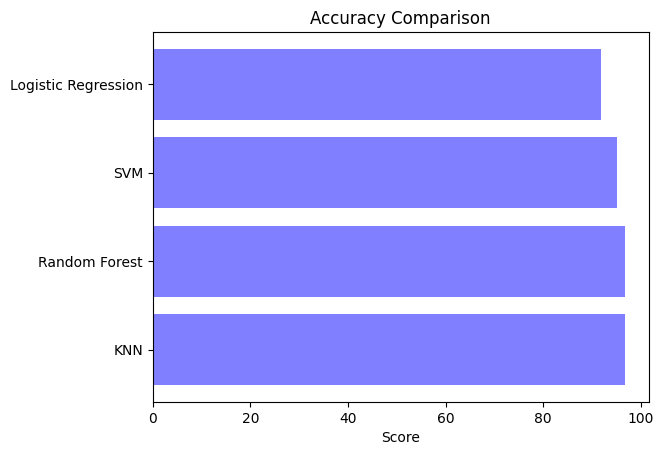

In [38]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, score, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Score')
plt2.title('Accuracy Comparison')
plt2.show()

In [41]:
results ={'Accuracy': [knn_result*100,rf_result*100,svm_result*100,log_result*100],
 'Recall':[recall_knn*100,recall_rf*100,recall_svm*100,recall_log*100],
 'Precision': [precision_knn*100,precision_rf*100,precision_svm*100,precision_log*100]}
index = ['KNN', 'Random Forest','SVM', 'Logistic Regression']

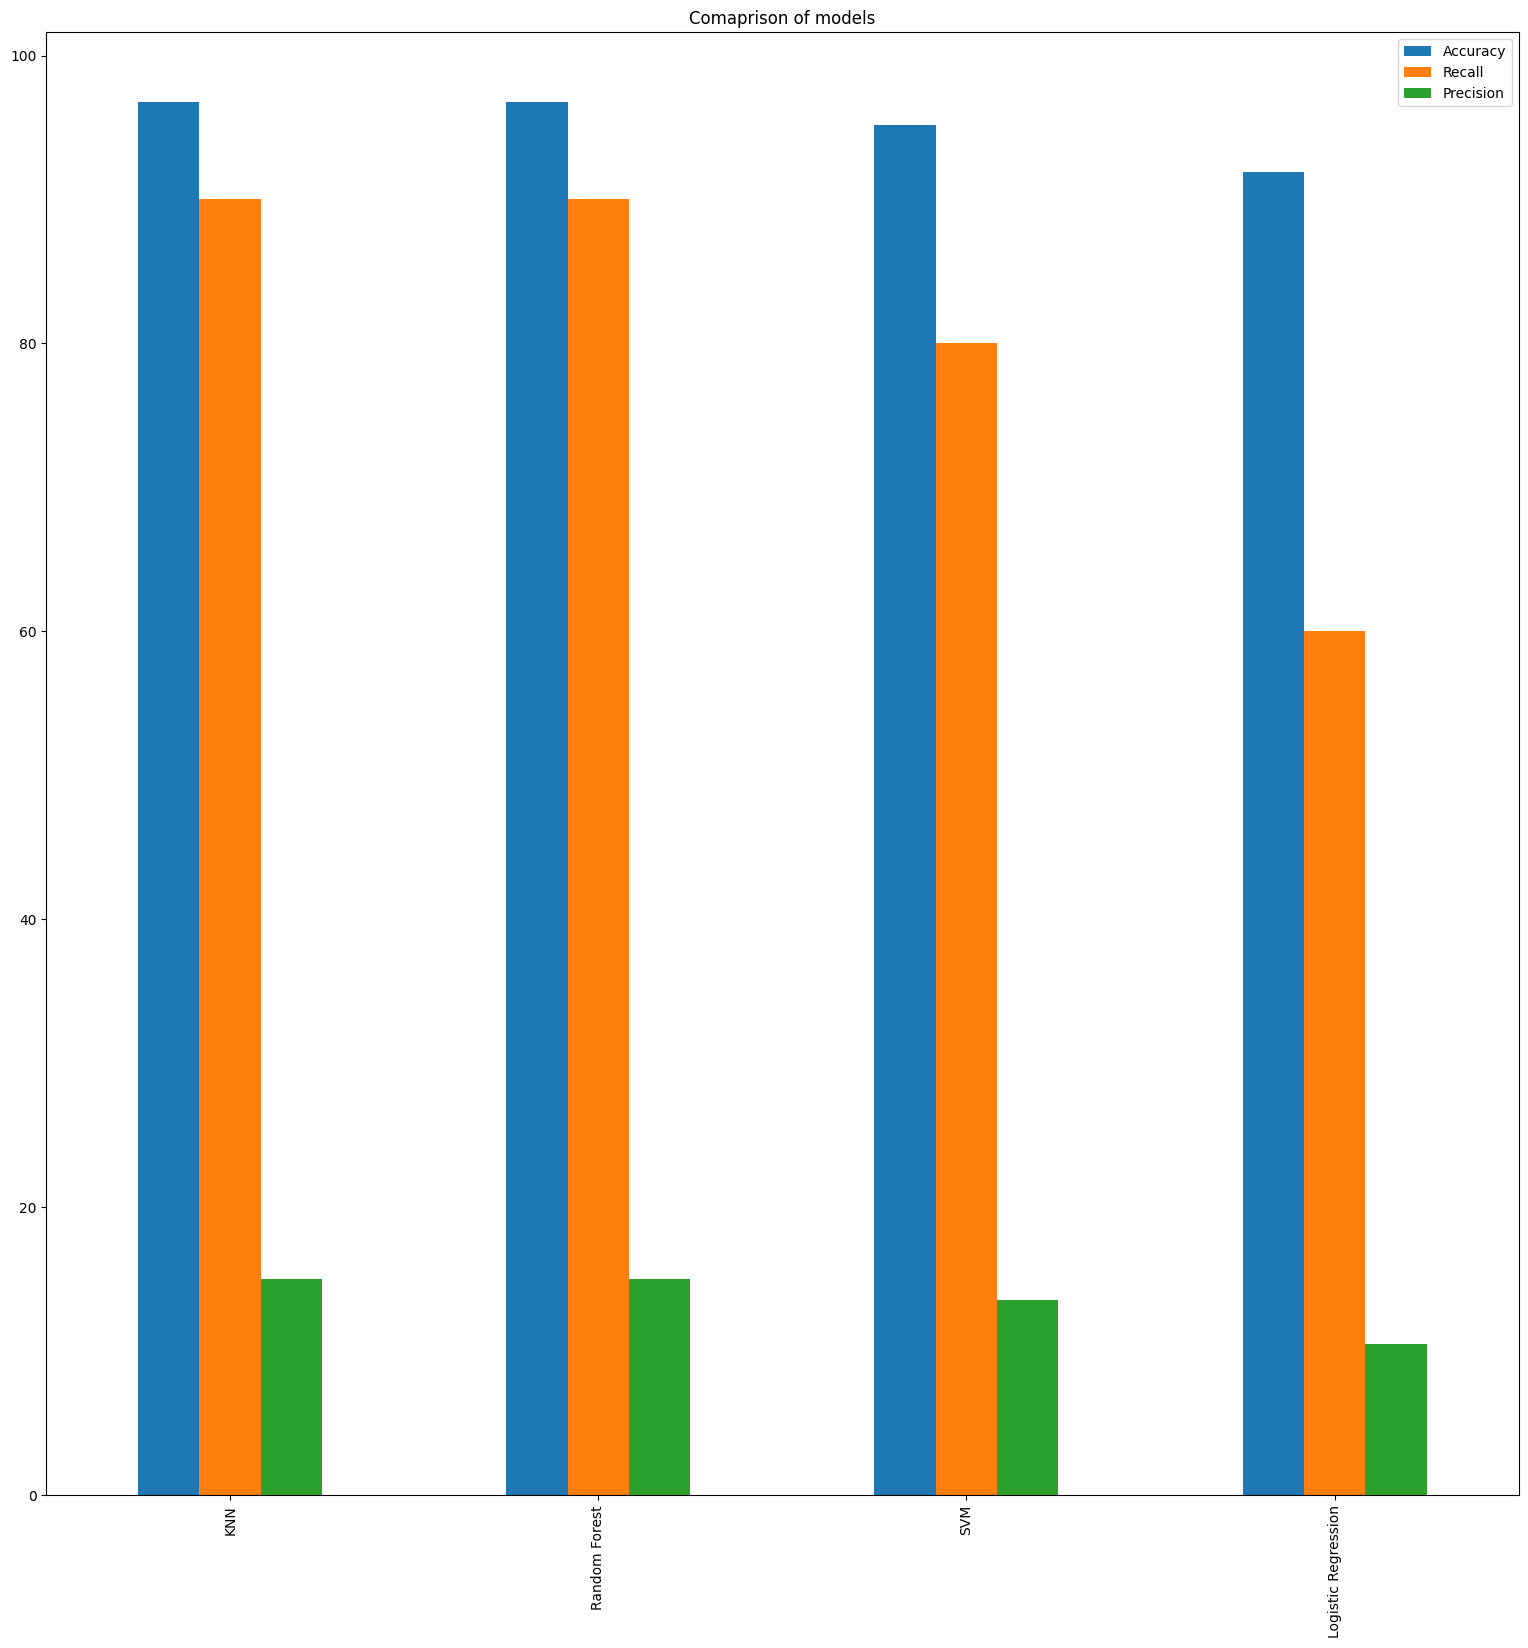

In [42]:
results =pd.DataFrame(results,index=index)
fig =results.plot(kind='bar',title='Comaprison of models',figsize =(19,19)).get_figure()
fig.savefig('acc.png')

# **Advanced Screening using VGG**

In [44]:
import numpy as np
import pandas as pd
import cv2
import keras
from numpy import random
import tensorflow as tf
import tensorflow_datasets as tfds
from matplotlib import pyplot as plt
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D
from keras.layers import MaxPooling2D, BatchNormalization
from keras.optimizers import SGD
from tensorflow.python.keras import utils
from keras.applications import MobileNet, VGG16, ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import classification_report ,confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import seaborn as sns
import os
from keras.applications import VGG16
from keras.models import Model
from keras.layers import Input, Conv2D, BatchNormalization, Activation, Add, Flatten, Dense, GlobalAveragePooling2D, Reshape, Multiply
import warnings
warnings.filterwarnings("ignore")

In [45]:
# Directory of train, validation and test
train_folder = "/kaggle/input/lungcancer4types-imagedataset/Data/train"
valid_folder = "/kaggle/input/lungcancer4types-imagedataset/Data/valid"
test_folder = "/kaggle/input/lungcancer4types-imagedataset/Data/test"

In [46]:
input_shape = (224,224,3)
num_classes = 4

train_datagen = ImageDataGenerator(
    dtype='float32',
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False
)
val_datagen = ImageDataGenerator(
    dtype='float32',

)
test_datagen = ImageDataGenerator(
    dtype='float32',
)
train_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size=(224,224),
    batch_size=64,
    class_mode='categorical',
)

test_generator = test_datagen.flow_from_directory(
    test_folder,
    target_size=(224,224),
    batch_size=64,
    class_mode='categorical',
    shuffle = False,
)
validation_generator = val_datagen.flow_from_directory(
    valid_folder,
    target_size=(224,224),
    batch_size=64,
    class_mode='categorical',
)

Found 613 images belonging to 4 classes.
Found 315 images belonging to 4 classes.
Found 72 images belonging to 4 classes.


In [47]:
def squeeze_excitation_block(input, ratio=16):
    init = input
    channel_axis = -1
    filters = init.shape[channel_axis]
    se_shape = (1, 1, filters)

    se = GlobalAveragePooling2D()(init)
    se = Reshape(se_shape)(se)
    se = Dense(filters // ratio, activation='relu', kernel_initializer='he_normal', use_bias=False)(se)
    se = Dense(filters, activation='sigmoid', kernel_initializer='he_normal', use_bias=False)(se)

    x = Multiply()([init, se])
    return x

In [48]:
def residual_block(x, filters, kernel_size, stride):
    shortcut = x
    x = Conv2D(filters, kernel_size, strides=stride, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(filters, kernel_size, padding='same')(x)
    x = BatchNormalization()(x)
    x = squeeze_excitation_block(x)
    x = Add()([x, shortcut])
    x = Activation('relu')(x)
    return x

In [49]:
input_tensor = Input(shape=(224, 224, 3))
vgg16 = VGG16(include_top=False, weights='imagenet', input_tensor=input_tensor)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [50]:
x = vgg16.layers[-1].output
x = residual_block(x, 512, 3, 1)
x = residual_block(x, 512, 3, 1)
x = BatchNormalization()(x)
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x)
model = Model(inputs=input_tensor, outputs=predictions)
model.summary()

optimizer = tf.keras.optimizers.SGD()
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

epochs = 100
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs,
    verbose=1
)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 224, 224,  │      1,792 │ input_layer[0][0] │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 224, 224,  │     36,928 │ block1_conv1[0][… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_pool         │ (None, 112, 112,  │          0 │ block1_conv2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_conv1        │ (None, 112, 112,  │     73,856 │ block1_pool[0][0] │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_conv2        │ (None, 112, 112,  │    147,584 │ block2_conv1[0][… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 56, 56,    │          0 │ block2_conv2[0][… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_conv1        │ (None, 56, 56,    │    295,168 │ block2_pool[0][0] │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_conv2        │ (None, 56, 56,    │    590,080 │ block3_conv1[0][… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_conv3        │ (None, 56, 56,    │    590,080 │ block3_conv2[0][… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_pool         │ (None, 28, 28,    │          0 │ block3_conv3[0][… │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_conv1        │ (None, 28, 28,    │  1,180,160 │ block3_pool[0][0] │
│ (Conv2D)            │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_conv2        │ (None, 28, 28,    │  2,359,808 │ block4_conv1[0][… │
│ (Conv2D)            │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_conv3        │ (None, 28, 28,    │  2,359,808 │ block4_conv2[0][… │
│ (Conv2D)            │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_pool         │ (None, 14, 14,    │          0 │ block4_conv3[0][… │
│ (MaxPooling2D)      │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block5_conv1        │ (None, 14, 14,    │  2,359,808 │ block4_pool[0][0] │
│ (Conv2D)            │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block5_conv2        │ (None, 14, 14,    │  2,359,808 │ block5_conv1[0][

 Total params: 50,447,684 (192.44 MB)

 Trainable params: 50,442,564 (192.42 MB)

 Non-trainable params: 5,120 (20.00 KB)

Epoch 1/100


2024-08-21 17:33:58.413300: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 181: 1.69967, expected 1.40412
2024-08-21 17:33:58.413354: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 223: 1.52722, expected 1.23167
2024-08-21 17:33:58.413563: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 50176: 3.12984, expected 2.53825
2024-08-21 17:33:58.413572: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 50178: 4.82583, expected 4.23423
2024-08-21 17:33:58.413580: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 50179: 4.45615, expected 3.86456
2024-08-21 17:33:58.413592: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 50181: 4.48578, expected 3.89419
2024-08-21 17:33:58.413605: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 50182: 4.06198, expected 3.47038
2024-08-21 17:33:58.413622: E e

 1/10 ━━━━━━━━━━━━━━━━━━━━ 8:05 54s/step - accuracy: 0.2703 - loss: 1.6307

2024-08-21 17:34:38.977010: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng15{k5=1,k6=0,k7=1,k10=1} for conv (f32[64,64,224,224]{3,2,1,0}, u8[0]{0}) custom-call(f32[64,3,224,224]{3,2,1,0}, f32[64,3,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0} is taking a while...
2024-08-21 17:34:39.413804: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 100352: 3.87759, expected 3.06898
2024-08-21 17:34:39.413881: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 100353: 6.47516, expected 5.66656
2024-08-21 17:34:39.413890: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 100354: 6.23991, expected 5.43131
2024-08-21 17:34:39.413899: E external/local_xla/xla/service/gpu/buffer_compar

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.3340 - loss: 1.4932 

W0000 00:00:1724261752.449503     228 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
2024-08-21 17:35:52.938503: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 50176: 4.39009, expected 3.53025
2024-08-21 17:35:52.938570: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 50177: 5.40727, expected 4.54742
2024-08-21 17:35:52.938586: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 50178: 5.56026, expected 4.70042
2024-08-21 17:35:52.938598: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 50179: 5.58812, expected 4.72827
2024-08-21 17:35:52.938612: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 50180: 4.9643, expected 4.10445
2024-08-21 17:35:52.938624: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 50181: 5.19898, expected 4.33914
2024-08-21 17:35:52.938634: E external/loc

10/10 ━━━━━━━━━━━━━━━━━━━━ 135s 9s/step - accuracy: 0.3414 - loss: 1.4773 - val_accuracy: 0.1806 - val_loss: 16.9481
Epoch 2/100


W0000 00:00:1724261758.389825     230 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 567ms/step - accuracy: 0.5307 - loss: 1.0616 - val_accuracy: 0.1944 - val_loss: 8.5877
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 575ms/step - accuracy: 0.5695 - loss: 1.0467 - val_accuracy: 0.1806 - val_loss: 18.3291
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 579ms/step - accuracy: 0.5356 - loss: 1.0957 - val_accuracy: 0.1806 - val_loss: 10.1426
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 566ms/step - accuracy: 0.6226 - loss: 0.9173 - val_accuracy: 0.1806 - val_loss: 10.1809
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 568ms/step - accuracy: 0.6393 - loss: 0.8536 - val_accuracy: 0.2500 - val_loss: 5.2947
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 571ms/step - accuracy: 0.6080 - loss: 0.8092 - val_accuracy: 0.3889 - val_loss: 3.1778
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 575ms/step - accuracy: 0.7353 - loss: 0.6462 - val_accuracy: 0.5556 - val_loss: 2.1731
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 577ms/step - accuracy: 0.7238 - loss: 0.6697 - val_accur

In [51]:
test_loss, test_accuracy = model.evaluate(test_generator)
print('Test accuracy:', test_accuracy)

4/5 ━━━━━━━━━━━━━━━━━━━━ 0s 828ms/step - accuracy: 0.8991 - loss: 0.3713

2024-08-21 17:58:35.216893: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng15{k5=1,k6=0,k7=1,k10=1} for conv (f32[59,64,224,224]{3,2,1,0}, u8[0]{0}) custom-call(f32[59,3,224,224]{3,2,1,0}, f32[64,3,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0} is taking a while...
2024-08-21 17:58:35.524954: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 2.90928, expected 2.18351
2024-08-21 17:58:35.525019: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 5.16945, expected 4.44367
2024-08-21 17:58:35.525033: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 5.13963, expected 4.41385
2024-08-21 17:58:35.525046: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] D

5/5 ━━━━━━━━━━━━━━━━━━━━ 29s 7s/step - accuracy: 0.9052 - loss: 0.3515 
Test accuracy: 0.9174603223800659


W0000 00:00:1724263139.192799     228 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


2/5 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step

W0000 00:00:1724263186.946454     228 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 612ms/step


W0000 00:00:1724263189.393341     229 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update




Confusion Matrix:
 [[107   3   0  10]
 [  5  42   0   4]
 [  4   0  50   0]
 [  0   0   0  90]]


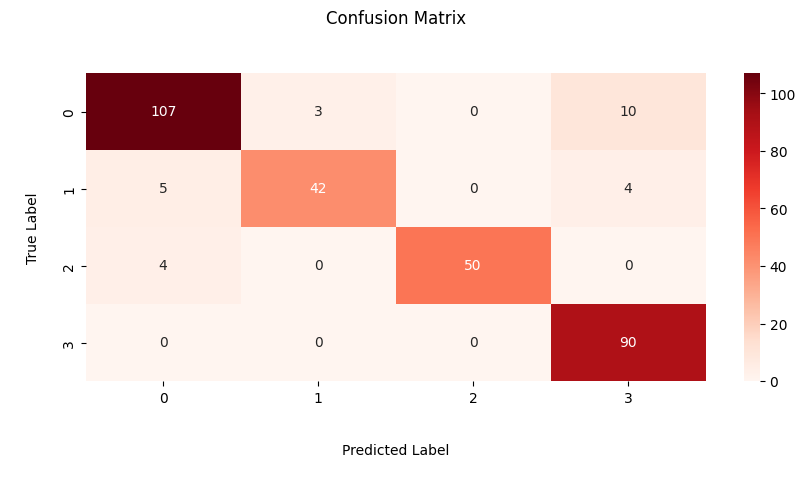

In [52]:
num_test_samples = len(test_generator)
num_classes = len(test_generator.class_indices)
predicted_probabilities = model.predict(test_generator, steps=num_test_samples)
predicted_labels = np.argmax(predicted_probabilities, axis=1)
true_labels = test_generator.classes
cm = confusion_matrix(true_labels, predicted_labels)
print("\n\nConfusion Matrix:\n", cm)

plt.figure(figsize=(10,4))
sns.heatmap(cm, annot=True, fmt='g', cmap='Reds')
plt.xlabel('\n\nPredicted Label\n')
plt.ylabel('\nTrue Label\n')
plt.title('Confusion Matrix\n\n')
plt.show()

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  antialiased or aa: bool
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  dash_capstyle: `.CapStyle` or {'butt', 'projecting', 'round'}
  dash_joinstyle: `.JoinStyle` or {'miter', 'round', 'bevel'}
  dashes: sequence of floats (on/off ink in points) or (None, None)
  data: (2, N) array or two 1D arrays
  drawstyle or ds: {'default', 'steps', 'steps-pre', 'steps-mid', 'steps-post'}, default: 'default'
  figure: `.Figure`
  fillstyle: {'full', 'left', 'right', 'bottom', 'top', 'none'}
  gapcolor: color or None
  gid: str
  in_layout: bool
  label: object
  linestyle or ls: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
  linewidth or lw: float
  marker: marker style string, `~.path.Path` or `~.markers.MarkerStyle`

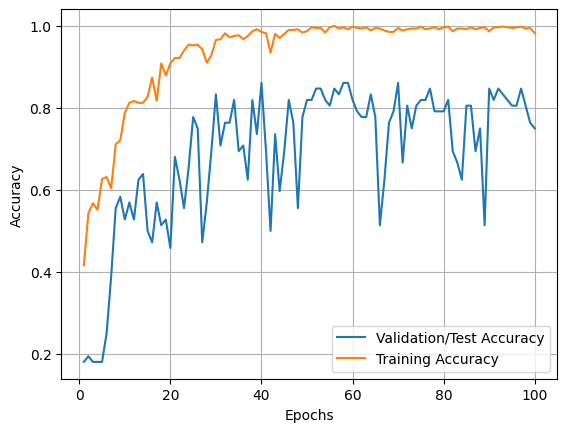

In [53]:
history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label = 'Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label = 'Training Accuracy')

plt.setp(line1)
plt.setp(line2)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  antialiased or aa: bool
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  dash_capstyle: `.CapStyle` or {'butt', 'projecting', 'round'}
  dash_joinstyle: `.JoinStyle` or {'miter', 'round', 'bevel'}
  dashes: sequence of floats (on/off ink in points) or (None, None)
  data: (2, N) array or two 1D arrays
  drawstyle or ds: {'default', 'steps', 'steps-pre', 'steps-mid', 'steps-post'}, default: 'default'
  figure: `.Figure`
  fillstyle: {'full', 'left', 'right', 'bottom', 'top', 'none'}
  gapcolor: color or None
  gid: str
  in_layout: bool
  label: object
  linestyle or ls: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
  linewidth or lw: float
  marker: marker style string, `~.path.Path` or `~.markers.MarkerStyle`

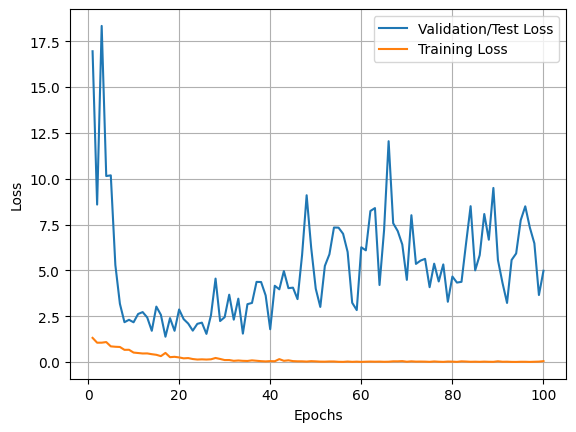

In [54]:
history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label = 'Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label = 'Training Loss')

plt.setp(line1)
plt.setp(line2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

In [55]:
report = classification_report(true_labels, predicted_labels)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       120
           1       0.93      0.82      0.87        51
           2       1.00      0.93      0.96        54
           3       0.87      1.00      0.93        90

    accuracy                           0.92       315
   macro avg       0.93      0.91      0.92       315
weighted avg       0.92      0.92      0.92       315

